In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

r = 1
N = 10000

sample = np.random.exponential(r, N)

sample_mean = np.mean(sample)

# Решаем уравнение метода моментов
estimated_r = 1 / sample_mean

# 2.1
print("Оценка параметра методом моментов:", estimated_r)

Оценка параметра методом моментов: 1.0011893076695089


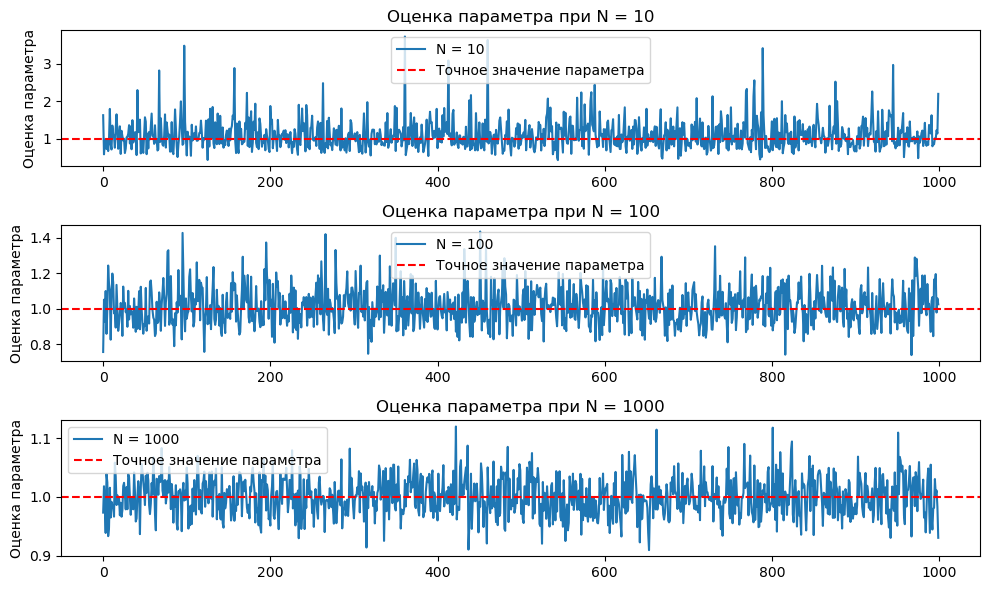

то есть метод моментов работает более точно при больших N


In [11]:
# 2.1
# Создаем список для сохранения оценок параметра для каждого размера выборки
estimated_r_list = []

sample_sizes = [10, 100, 1000]

for size in sample_sizes:
    # Создаем список для сохранения оценок параметра для текущего размера выборки
    estimated_r_current = []
    
    # Генерируем 1000 выборочных реализаций для текущего размера выборки
    for i in range(1000):
        # Генерируем выборку
        sample = np.random.exponential(r, size)
        
        # Вычисляем выборочное среднее
        sample_mean = np.mean(sample)
        
        # Вычисляем оценку параметра методом моментов
        # https://bebi103a.github.io/lessons/19/method_of_moments.html
        estimated_r = 1 / sample_mean
        
        # Добавляем оценку параметра в список
        estimated_r_current.append(estimated_r)
    
    # Добавляем список оценок параметра для текущего размера выборки в общий список
    estimated_r_list.append(estimated_r_current)

# Построение графиков
plt.figure(figsize=(10, 6))

for i, N in enumerate(sample_sizes):
    plt.subplot(3, 1, i+1)
    plt.plot(estimated_r_list[i], label=f'N = {N}')
    plt.axhline(y=1, color='r', linestyle='--', label='Точное значение параметра')
    plt.ylabel('Оценка параметра')
    plt.title(f'Оценка параметра при N = {N}')
    plt.legend()

plt.tight_layout()
plt.show()

print('то есть метод моментов работает более точно при больших N')

Оценка методом максимального правдоподобия: 0.997443239898058


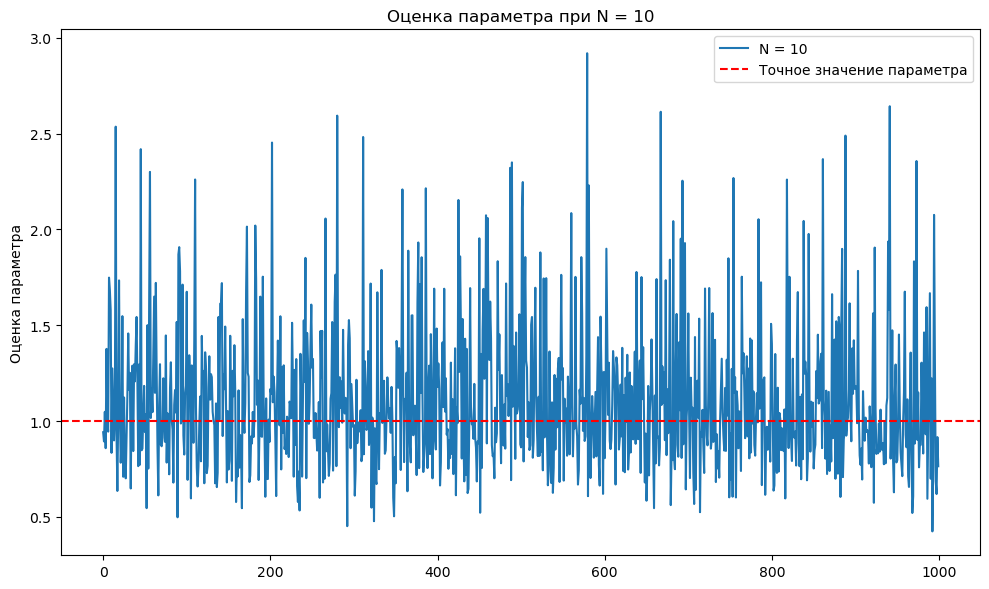

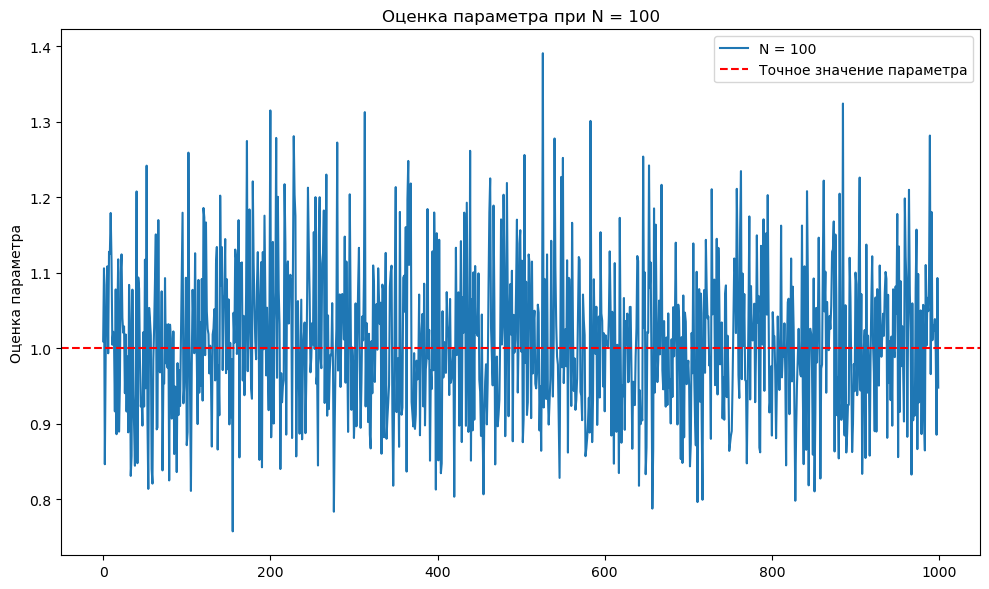

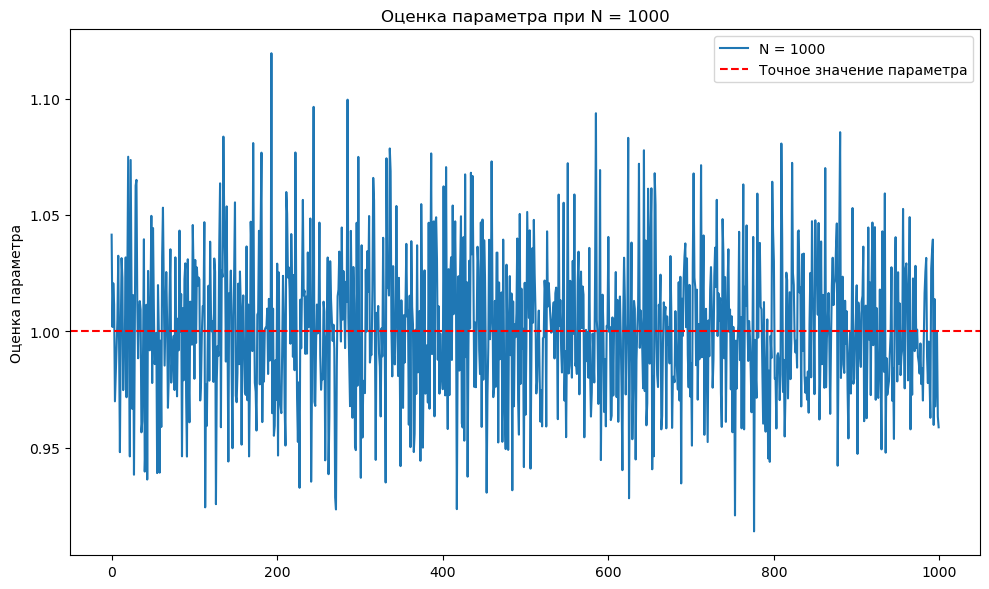

In [22]:
# 2.2

r = 1
N = 10000

sample = np.random.exponential(r, N)

# Функция правдоподобия для экспоненциального распределения
# https://colab.research.google.com/github/IgnatovD/math_statistics/blob/master/01_Point_estimates/maximum_likelihood_estimation.ipynb#scrollTo=juL9cIjQW2kW
def likelihood_function(r, sample, N):
    likelihood = (r ** N) * np.exp(-r * np.sum(sample)) 
    return likelihood

# Функция оценки параметра методом максимального правдоподобия
def estimate_parameter_mle(r, sample, N):
    estimated_r_mle = N / np.sum(sample)
    return estimated_r_mle

print('Оценка методом максимального правдоподобия:', estimate_parameter_mle(r, sample, N))

# 2.2
sample_sizes = [10, 100, 1000]

for size in sample_sizes:
    # Создаем список для сохранения оценок параметра для текущего размера выборки
    estimated_r_current = []
    
    # Генерируем 1000 выборочных реализаций для текущего размера выборки
    for i in range(1000):
        # Генерируем выборку
        sample = np.random.exponential(r, size)
        
        # Вычисляем оценку параметра методом максимального правдоподобия
        estimated_r = estimate_parameter_mle(r, sample, size)
        estimated_r_current.append(estimated_r)

    # Построение графиков
    plt.figure(figsize=(10, 6))
    
    #plt.subplot(3, 1, 1)
    plt.plot(estimated_r_current, label=f'N = {size}')
    plt.axhline(y=1, color='r', linestyle='--', label='Точное значение параметра')
    plt.ylabel('Оценка параметра')
    plt.title(f'Оценка параметра при N = {size}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [23]:
# 2.3
r = 1
N = 10000

estimated_r_mle_list = []

# Сгенерируем 100 выборочных реализаций
for _ in range(100):
    sample = np.random.exponential(r, N)
    
    # Оценим параметр методом максимального правдоподобия для данной выборки
    estimated_r_mle = estimate_parameter_mle(r, sample, N)
    estimated_r_mle_list.append(estimated_r_mle)

# Оценим среднее значение, дисперсию и смещение оценок параметра
mean_estimate = np.mean(estimated_r_mle_list)
variance_estimate = np.var(estimated_r_mle_list)
bias_estimate = mean_estimate - r 

# Выведем результаты
print("Среднее значение оценок параметра:", mean_estimate)
print("Дисперсия оценок параметра:", variance_estimate)
print("Смещение оценки параметра:", bias_estimate)

Среднее значение оценок параметра: 1.001591978262488
Дисперсия оценок параметра: 0.00010556757015117112
Смещение оценки параметра: 0.0015919782624880252


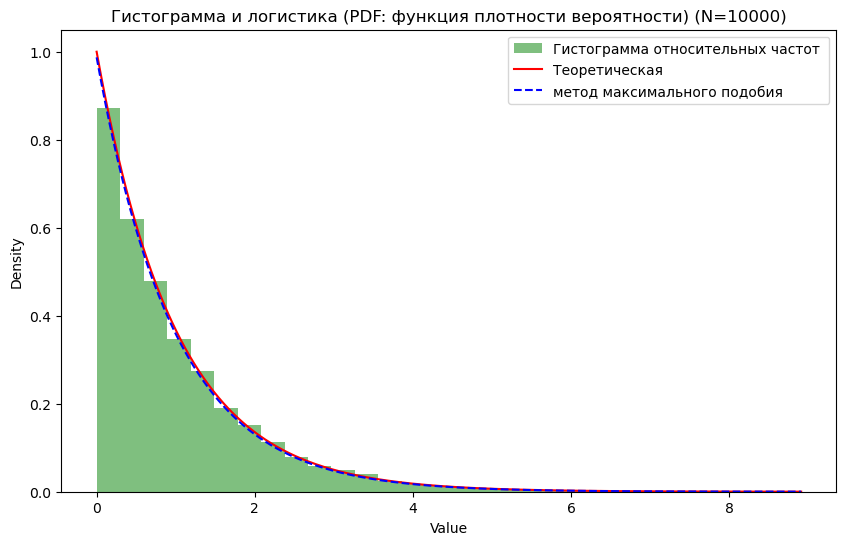

In [28]:
# Функция плотности вероятности экспоненциального распределения
def exponential_pdf(x, r):
    return r * np.exp(-x / r)

# Расчет гистограммы и эмпирической функции распределения
r = 1
N = 10000

sample = np.random.exponential(r, N)

#Гистограмма относительных частот
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(sample, bins=30, density=True, alpha=0.5, color='g', label='Гистограмма относительных частот ')

#Теоритическая плотность вероятности с истинными параметрами
x = np.linspace(min(sample), max(sample), 1000)
pdf_true = exponential_pdf(x, r)

#Теоретическая плотность вероятности с оцененными параметрами
plt.plot(x, pdf_true, label='Теоретическая', color='r')
l_mle_for_large_sample = estimate_parameter_mle(r, sample, N)
pdf_estimated = exponential_pdf(x, l_mle_for_large_sample)
plt.plot(x, pdf_estimated, label='метод максимального подобия', color='blue', linestyle='--')

plt.title('Гистограмма и логистика (PDF: функция плотности вероятности) (N=10000)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

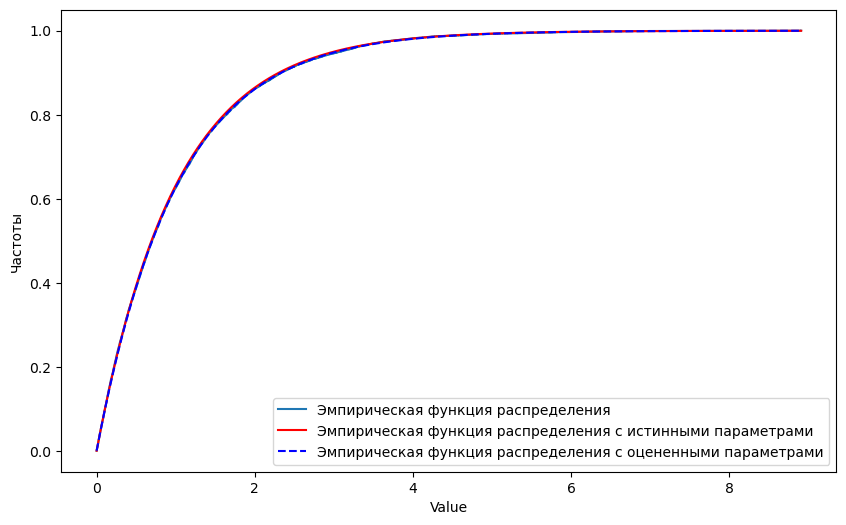

In [36]:
#Расчет эмпирической функции распределения
a = np.sort(sample)
n = len(sample)
ecdf = np.arange(1, n + 1) / n

#Теоретическая функция распределения с истинными параметрами
cdf_true = 1 - np.exp(a * -r)

#Теоретическая функция распределения с оцененными параметрами
cdf_estimated = 1 - np.exp(a * -l_mle_for_large_sample)

#Построение графиков
plt.figure(figsize=(10, 6))
plt.step(a, ecdf, label='Эмпирическая функция распределения', where='post')
plt.plot(a, cdf_true, label='Эмпирическая функция распределения с истинными параметрами', color='r')
plt.plot(a, cdf_estimated, label='Эмпирическая функция распределения с оцененными параметрами', color='blue', linestyle='--')


plt.xlabel('Value')
plt.ylabel('Частоты')
plt.legend()
plt.show()